<a href="https://colab.research.google.com/github/hechtcarmel/IntroductionToML_MajorHW1/blob/main/MajorHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Data Exploration and Preparation

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Our imports
from sklearn.model_selection import train_test_split

## Loading the dataset

In [225]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [226]:
dataset = pd.read_csv(filename)

In [245]:
#Q1
dataset.shape



(3000, 29)

In [246]:
#Q2
dataset['num_of_siblings'].value_counts()

2.0    754
1.0    707
3.0    554
0.0    400
4.0    272
5.0    120
6.0     29
7.0      7
8.0      2
9.0      1
Name: num_of_siblings, dtype: int64

In [247]:
#Q3 
list(dataset.columns.values)
dataset.head(10)


,patient_id,age,sex,weight,blood_type,address,current_location,job,num_of_siblings,happiness_score,household_income,pcr_date,symptoms,conversations_per_day,sugar_levels,sport_activity,PCR_01,PCR_02,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,risk,spread,covid
0,9454,26.0,M,109.9,O+,07791 Nelson Mou...,"('33.41012', '-9...","Presenter, broad...",2.0,6.0,239.6,2020-12-07,NaN,1.0,105.0,1.0,-0.039056,-0.457470,100.816630,131.131165,8.0,17.146052,4.577239,3.157098,0.604181,6.0,High,Low,False
1,9657,16.0,F,34.7,A+,748 Barnett Unio...,"('55.62047', '37...",Print production...,2.0,8.0,92.2,2021-04-10,NaN,3.0,100.0,2.0,0.095461,0.555998,205.262835,171.135863,3.0,1.891541,-9.881538,-1.315507,8.737819,4.0,High,Low,True
2,4658,14.0,M,57.1,AB+,7424 Andrew Thro...,"('40.65538', '-7...",NaN,2.0,9.0,698.7,2020-04-09,NaN,3.0,94.0,NaN,0.133005,-0.983571,165.546893,85.790478,2.0,-1.619890,-4.069062,-1.184209,3.333429,3.0,Low,High,True
3,10495,5.0,M,25.8,A+,404 Christopher ...,"('32.5007', '-94...",NaN,2.0,9.0,31.0,2021-01-31,NaN,3.0,NaN,1.0,NaN,-0.191909,225.742665,266.829714,4.0,4.849942,-18.282947,-1.470706,NaN,6.0,Low,Low,True
4,14475,10.0,F,38.4,B+,1507 Gomez Creek...,"('45.47885', '13...",NaN,3.0,5.0,281.8,2020-03-06,NaN,2.0,73.0,0.0,-0.613797,-0.835503,132.328403,94.114375,2.0,-2.290169,-20.622331,NaN,-3.147700,6.0,Low,Low,True
5,13676,13.0,NaN,52.9,A+,11055 Ann Harbor...,"('44.73941', '-9...",NaN,3.0,7.0,299.3,2021-02-28,NaN,1.0,92.0,1.0,0.294139,0.393741,164.396579,229.917242,3.0,0.542513,10.819353,1.685410,NaN,6.0,High,Low,True
6,11924,13.0,M,29.8,A+,0968 Kelly Garde...,"('60.97944', '76...",NaN,2.0,8.0,37.2,2021-04-19,fever,5.0,101.0,3.0,-0.213702,0.322429,325.889786,157.462478,1.0,-5.650077,14.161267,-1.190432,3.511498,6.0,High,High,True
7,6612,10.0,M,26.9,A+,23097 Brenda Sho...,"('39.96097', '-7...",NaN,0.0,6.0,43.5,2020-01-01,low_appetite;fever,2.0,40.0,5.0,-0.168007,0.138668,249.072883,239.399078,1.0,-5.212188,-2.631423,0.423356,7.685642,4.0,Low,High,True
8,6915,2.0,F,41.7,O+,05403 Duncan Hol...,"('31.20176', '29...",NaN,3.0,7.0,32.9,2020-04-04,low_appetite;hea...,1.0,57.0,3.0,-0.437508,0.019485,189.721242,309.944157,5.0,6.095490,-10.420480,-0.062290,5.467190,5.0,High,Low,True
9,5887,8.0,F,40.0,AB+,5164 Emma Strave...,"('-28.81833', '-...",NaN,1.0,6.0,774.1,2020-12-18,cough;shortness_...,6.0,90.0,2.0,-0.014870,-1.031501,87.087543,133.100880,2.0,-2.108215,-2.641417,10.060925,-3.344656,7.0,Low,High,True


In [248]:
#Q5
train_set, test_set = train_test_split(dataset, test_size=0.2, train_size=0.8, random_state=4)
print(train_set)
print(test_set)

      patient_id   age sex  weight  ... PCR_10  risk spread  covid
433         4061  15.0   F    48.7  ...    5.0  High   High  False
1639        9558  13.0   F    20.9  ...    5.0   Low   High  False
828        12028   4.0   F    25.6  ...    4.0  High   High   True
1256        4148  22.0   M    78.5  ...    5.0  High   High   True
694        14655   NaN   F    48.0  ...    5.0   Low    Low   True
...          ...   ...  ..     ...  ...    ...   ...    ...    ...
1921        7107  32.0   M    91.2  ...    3.0   Low   High   True
709        14122   NaN   M    80.8  ...    6.0  High    Low  False
2487         375  24.0   F    64.8  ...    5.0   Low   High  False
174         8238  32.0   F    79.8  ...    2.0   Low   High   True
1146        3043  11.0   M    42.8  ...    NaN  High   High  False

[2400 rows x 29 columns]
      patient_id   age sex  weight  ... PCR_10  risk spread  covid
571         5349   7.0   F    35.4  ...    4.0   Low   High   True
1674       13830   8.0   F    25.8  

In [249]:
#Q6
blood_type_ohe_vec = pd.get_dummies(train_set['blood_type'])
blood_type_ohe_vec

,A+,A-,AB+,AB-,B+,B-,O+,O-
433,1,0,0,0,0,0,0,0
1639,0,0,0,0,0,0,1,0
828,1,0,0,0,0,0,0,0
1256,1,0,0,0,0,0,0,0
694,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1921,1,0,0,0,0,0,0,0
709,0,0,0,0,0,0,0,1
2487,0,0,0,0,0,0,1,0
174,1,0,0,0,0,0,0,0


In [250]:
#Q7
symptoms_ohe_vec = train_set['symptoms'].str.get_dummies(sep=';')
symptoms_ohe_vec
train_set = pd.concat([train_set, symptoms_ohe_vec], axis=1)
#train_set = train_set.drop('symptoms', axis=1)
train_set


,patient_id,age,sex,weight,blood_type,address,current_location,job,num_of_siblings,happiness_score,household_income,pcr_date,symptoms,conversations_per_day,sugar_levels,sport_activity,PCR_01,PCR_02,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,risk,spread,covid,cough,fever,headache,low_appetite,shortness_of_breath
433,4061,15.0,F,48.7,A+,9123 Vincent Can...,"('54.8421', '46....",NaN,NaN,7.0,191.0,2020-05-08,NaN,2.0,85.0,1.0,-0.507558,-0.853710,289.432254,268.442310,6.0,NaN,-13.287314,9.321742,-2.387208,5.0,High,High,False,0,0,0,0,0
1639,9558,13.0,F,20.9,O+,"PSC 1586, Box 22...","('26.91756', '-8...",NaN,1.0,7.0,63.3,2020-10-16,NaN,2.0,61.0,1.0,-0.714683,0.779043,299.762857,42.365911,0.0,-8.508535,0.366691,8.856821,-3.370417,5.0,Low,High,False,0,0,0,0,0
828,12028,4.0,F,25.6,A+,2800 Jesse Islan...,"('40.65538', '-7...",NaN,2.0,9.0,268.3,2020-05-01,low_appetite,2.0,76.0,1.0,-0.207918,1.055576,296.427742,304.607983,6.0,10.224120,NaN,-0.959944,9.335705,4.0,High,High,True,0,0,0,1,0
1256,4148,22.0,M,78.5,A+,912 Horne Strave...,"('40.24537', '-7...",NaN,3.0,8.0,498.2,2020-08-21,NaN,6.0,120.0,1.0,-0.364439,-0.297543,343.003183,149.682366,4.0,3.914358,9.208969,0.213054,4.512943,5.0,High,High,True,0,0,0,0,0
694,14655,NaN,F,48.0,O+,354 Stephanie Po...,"('3.3285', '99.1...",NaN,0.0,5.0,177.1,2020-05-05,fever,NaN,103.0,0.0,0.680255,0.861323,282.972794,285.591317,5.0,5.988083,-1.168262,-2.374915,4.075601,5.0,Low,Low,True,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,7107,32.0,M,91.2,A+,0990 Stewart Spr...,"('43.67681', '4....",Industrial buyer,3.0,7.0,772.9,2021-04-24,NaN,5.0,72.0,1.0,-0.534772,0.054121,71.745611,188.467977,2.0,-0.584523,10.902460,-1.576420,3.253882,3.0,Low,High,True,0,0,0,0,0
709,14122,NaN,M,80.8,O-,NaN,"('38.58894', '-8...",Clothing/textile...,1.0,7.0,105.0,2020-11-06,headache,1.0,NaN,2.0,0.396784,0.104316,177.308219,270.643826,2.0,-1.656963,-0.936450,-1.241625,4.136200,6.0,High,Low,False,0,0,1,0,0
2487,375,24.0,F,64.8,O+,USS Davis\nFPO A...,"('53.5942', '25....","Psychologist, ed...",0.0,7.0,519.0,2020-05-12,NaN,5.0,96.0,2.0,0.790749,0.448165,56.947837,51.164180,4.0,3.055605,13.905306,NaN,0.466819,5.0,Low,High,False,0,0,0,0,0
174,8238,32.0,F,79.8,A+,12944 Hoffman Fr...,"('-7.60361', '37...",Public relations...,0.0,5.0,NaN,2020-03-21,NaN,2.0,91.0,1.0,0.734759,-0.322438,11.832190,157.066045,0.0,-7.222110,2.932427,-0.601470,7.703267,2.0,Low,High,True,0,0,0,0,0


In [251]:
#Q8

#Extracting the states from "adress" which we classified as "Neither"
def calc_new_col(row):
    if pd.isnull(row['address']):
      return np.nan
    return row['address'].split(' ')[-2]

train_set['state'] = train_set.apply(calc_new_col, axis=1)


#Taking care of chosen categorical features.
categorical_features = ['sex'] #"job"
for col in categorical_features:
  dummies = pd.get_dummies(train_set[col])
  train_set = pd.concat([train_set, dummies], axis=1)
  #train_set = train_set.drop(col, axis=1)

#train_set
#print(train_set['state'])

kde = False column = patient_id
kde = False column = age
kde = False column = sex
kde = False column = weight
kde = False column = blood_type
kde = False column = address
kde = False column = current_location
kde = False column = job
kde = False column = num_of_siblings
kde = False column = happiness_score
kde = False column = household_income
kde = False column = pcr_date
kde = False column = symptoms
kde = False column = conversations_per_day
kde = False column = sugar_levels
kde = False column = sport_activity
kde = False column = PCR_01
kde = False column = PCR_02
kde = False column = PCR_03
kde = False column = PCR_04
kde = False column = PCR_05
kde = False column = PCR_06
kde = False column = PCR_07
kde = False column = PCR_08
kde = False column = PCR_09
kde = False column = PCR_10
kde = False column = risk
kde = False column = spread
kde = False column = covid
kde = False column = cough


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


kde = False column = fever
kde = False column = headache
kde = False column = low_appetite
kde = False column = shortness_of_breath
kde = False column = state
kde = False column = F
kde = False column = M


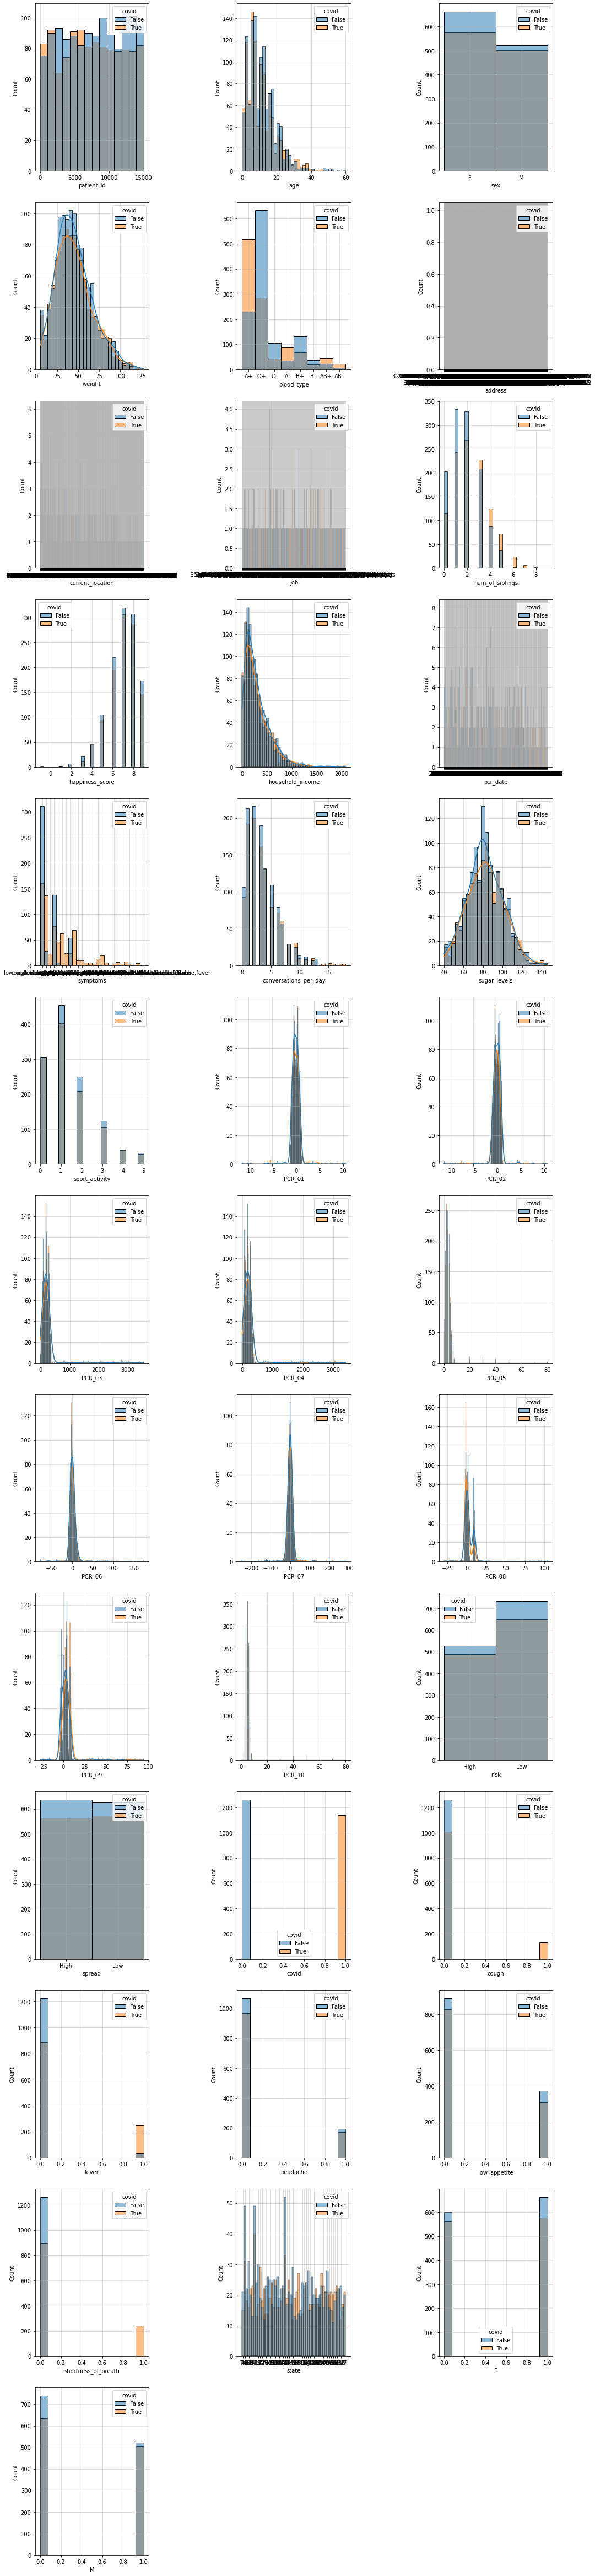

In [252]:
#Q8 Graph 1
CONTINUOUS_COLUMNS = ['weight', 'household_income', 'sugar_levels', 'PCR_01', 'PCR_02', 'PCR_03','PCR_04','PCR_02','PCR_06','PCR_07','PCR_08','PCR_09']
COL_NAME = train_set.columns.values.tolist()
COLS = 3
ROWS = int(np.ceil(len(COL_NAME) / COLS))
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 use_kde=True if column in CONTINUOUS_COLUMNS else False
 print("kde = " + str(kde) + " column = " + str(column))
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=train_set, x=column, hue=train_set.covid, kde=use_kde)
 plt.grid(alpha=0.5)
plt.tight_layout()



<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


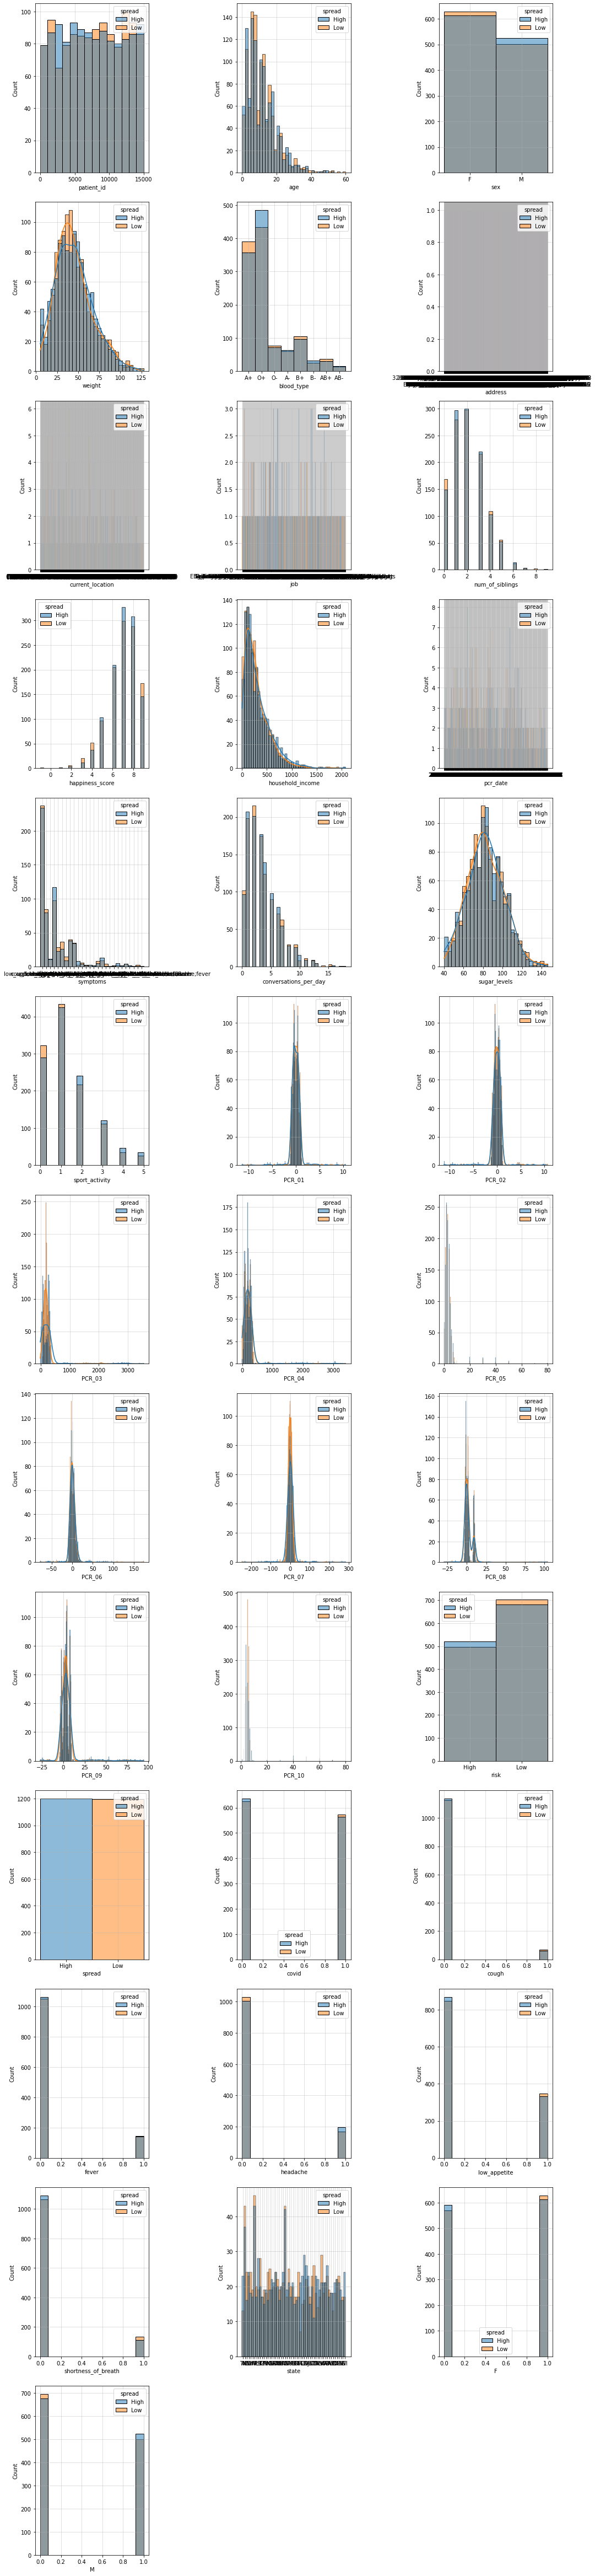

In [253]:

#Q8 Graph 2
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=train_set, x=column, hue=train_set.spread, kde=True if column in CONTINUOUS_COLUMNS else False)
 plt.grid(alpha=0.5)
plt.tight_layout()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


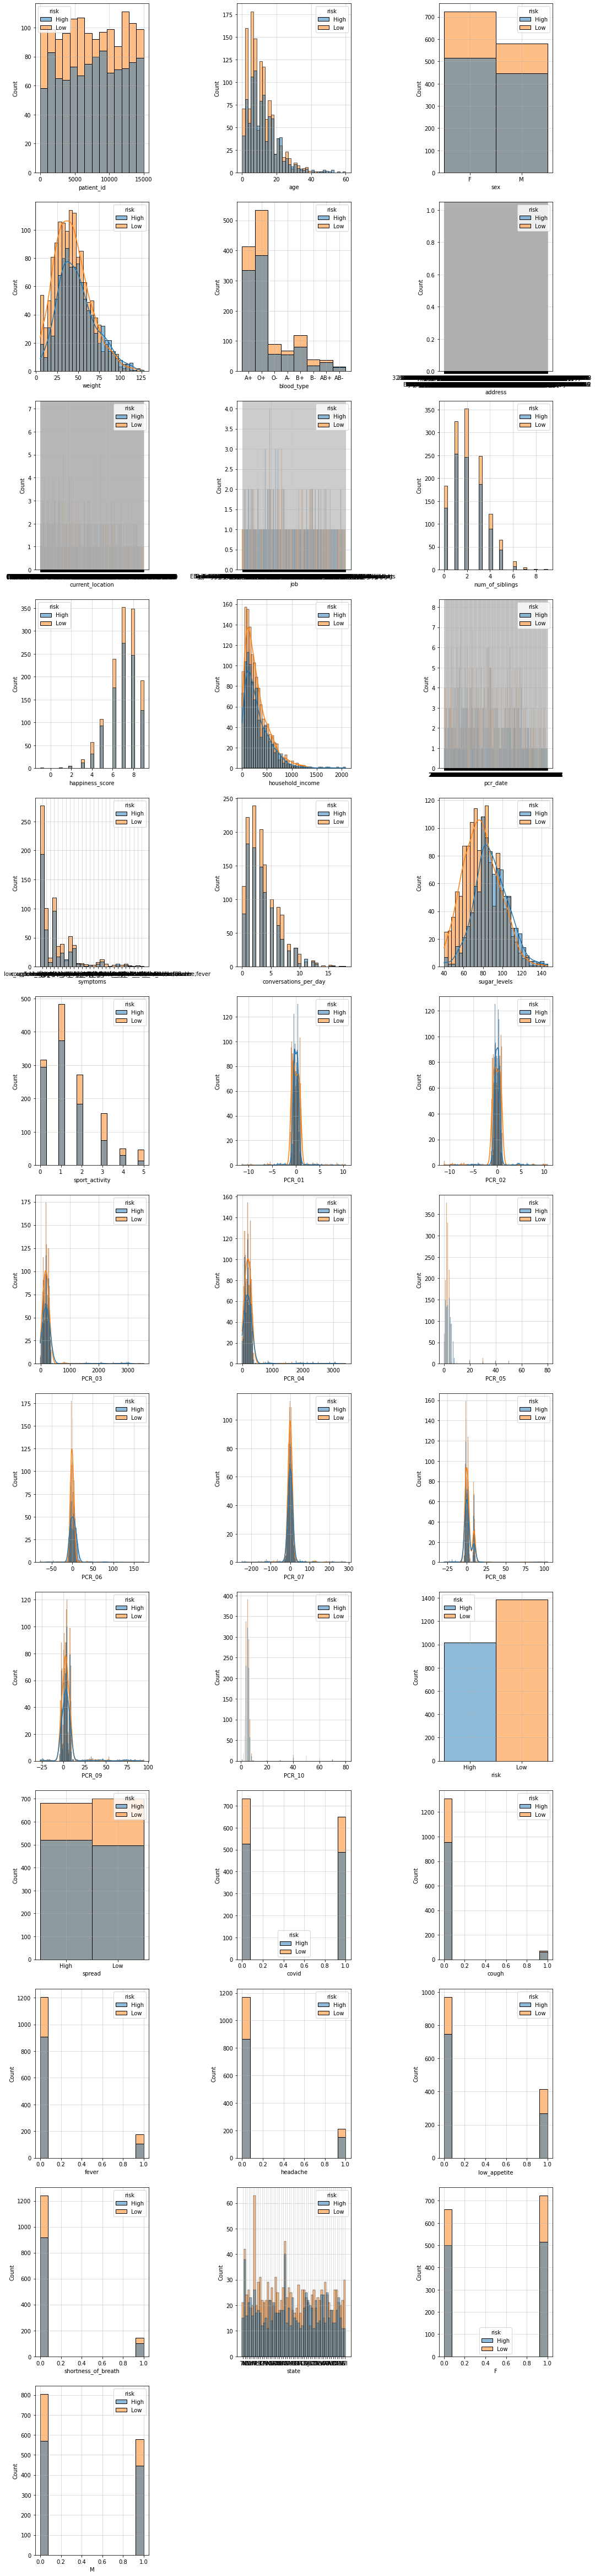

In [254]:

#Q8 Graph 3

plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
 plt.subplot(ROWS,COLS,i)
 sns.histplot(data=train_set, x=column, hue=train_set.risk, kde=True if column in CONTINUOUS_COLUMNS else False)
 plt.grid(alpha=0.5)
plt.tight_layout()

# How to download from Colab?

In [255]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [256]:
pd.options.display.max_colwidth = 20
pd.set_option('display.max_rows', 30)
#train_set['address'].head(3000)

"""
train_set['state'] = train_set['state'].astype('category')
train_set['sex']  = train_set['sex'].astype('category')
train_set['blood_type'] = train_set['blood_type'].astype('category')
train_set['job']  = train_set['job'].astype('category')
train_set['pcr_date']  = train_set['pcr_date'].astype('string')
"""

print(train_set.columns.values.tolist())
train_set.info(verbose=True)
train_set.head(10)


['patient_id', 'age', 'sex', 'weight', 'blood_type', 'address', 'current_location', 'job', 'num_of_siblings', 'happiness_score', 'household_income', 'pcr_date', 'symptoms', 'conversations_per_day', 'sugar_levels', 'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10', 'risk', 'spread', 'covid', 'cough', 'fever', 'headache', 'low_appetite', 'shortness_of_breath', 'state', 'F', 'M']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 433 to 1146
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             2400 non-null   int64  
 1   age                    2259 non-null   float64
 2   sex                    2265 non-null   object 
 3   weight                 2293 non-null   float64
 4   blood_type             2287 non-null   object 
 5   address                2280 non-null   object 
 6   current_location       

,patient_id,age,sex,weight,blood_type,address,current_location,job,num_of_siblings,happiness_score,household_income,pcr_date,symptoms,conversations_per_day,sugar_levels,sport_activity,PCR_01,PCR_02,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,risk,spread,covid,cough,fever,headache,low_appetite,shortness_of_breath,state,F,M
433,4061,15.0,F,48.7,A+,9123 Vincent Can...,"('54.8421', '46....",NaN,NaN,7.0,191.0,2020-05-08,NaN,2.0,85.0,1.0,-0.507558,-0.853710,289.432254,268.442310,6.0,NaN,-13.287314,9.321742,-2.387208,5.0,High,High,False,0,0,0,0,0,TX,1,0
1639,9558,13.0,F,20.9,O+,"PSC 1586, Box 22...","('26.91756', '-8...",NaN,1.0,7.0,63.3,2020-10-16,NaN,2.0,61.0,1.0,-0.714683,0.779043,299.762857,42.365911,0.0,-8.508535,0.366691,8.856821,-3.370417,5.0,Low,High,False,0,0,0,0,0,AE,1,0
828,12028,4.0,F,25.6,A+,2800 Jesse Islan...,"('40.65538', '-7...",NaN,2.0,9.0,268.3,2020-05-01,low_appetite,2.0,76.0,1.0,-0.207918,1.055576,296.427742,304.607983,6.0,10.224120,NaN,-0.959944,9.335705,4.0,High,High,True,0,0,0,1,0,MD,1,0
1256,4148,22.0,M,78.5,A+,912 Horne Strave...,"('40.24537', '-7...",NaN,3.0,8.0,498.2,2020-08-21,NaN,6.0,120.0,1.0,-0.364439,-0.297543,343.003183,149.682366,4.0,3.914358,9.208969,0.213054,4.512943,5.0,High,High,True,0,0,0,0,0,WY,0,1
694,14655,NaN,F,48.0,O+,354 Stephanie Po...,"('3.3285', '99.1...",NaN,0.0,5.0,177.1,2020-05-05,fever,NaN,103.0,0.0,0.680255,0.861323,282.972794,285.591317,5.0,5.988083,-1.168262,-2.374915,4.075601,5.0,Low,Low,True,0,1,0,0,0,NY,1,0
1713,10488,20.0,F,66.4,O-,32652 Christina ...,"('-4.42472', '-4...",Personnel officer,5.0,6.0,78.0,2020-10-10,NaN,4.0,80.0,1.0,0.865081,-0.564781,NaN,150.164568,2.0,-3.547459,-4.429241,1.081865,2.291812,5.0,Low,Low,False,0,0,0,0,0,HI,1,0
2410,10815,6.0,M,26.0,O+,Unit 7504 Box 95...,"('13.70167', '-8...",NaN,4.0,7.0,155.3,2021-02-24,NaN,1.0,68.0,1.0,-0.341406,-0.911246,303.002182,79.980804,4.0,4.140738,4.338295,-2.115702,NaN,2.0,Low,High,False,0,0,0,0,0,AP,0,1
2066,2272,19.0,M,66.9,A+,NaN,"('-33.59217', '-...",Homeopath,1.0,9.0,277.0,2020-06-16,NaN,3.0,98.0,1.0,-0.217125,0.356748,187.266239,14.632908,6.0,7.579327,4.029465,10.520021,-2.420706,6.0,High,Low,False,0,0,0,0,0,NaN,0,1
2665,411,13.0,F,NaN,O+,88433 Megan Lodg...,"('33.78333', '11...",NaN,1.0,8.0,1094.6,2021-01-23,NaN,4.0,69.0,3.0,0.552755,0.205249,330.600045,216.581593,2.0,-2.278611,-12.009003,-2.380092,2.878470,6.0,Low,High,False,0,0,0,0,0,IL,1,0
1749,6698,6.0,M,11.0,O+,"PSC 4156, Box 77...","('39.43534', '-8...",NaN,0.0,9.0,18.8,2020-05-07,low_appetite;sho...,4.0,62.0,0.0,-1.051898,-0.298552,183.060444,43.399736,1.0,-4.738549,0.723147,-0.743194,3.185914,4.0,Low,Low,True,0,0,0,1,1,AE,0,1
